# Analysis of Content on Netflix

Netflix is an OTT(Over-the-top media) platform which has large number of movies and tvshows.

In this notebook we'll take a look at the Netflix dataset and try to answer some questions

In [ ]:
project_name = "netflix-movies-tvshows-analysis"
file_name = 'netflix_titles-1.csv'

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name,files = [file_name])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "kanishkapatil03/netflix-movies-tvshows-analysis" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ml/kanishkapatil03/netflix-movies-tvshows-analysis


'https://jovian.ml/kanishkapatil03/netflix-movies-tvshows-analysis'

## Data Preparation and Cleaning

First we will have a peek at the dataset to get basic overview of the data

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
netflix_data_raw = pd.read_csv('netflix_titles-1.csv')

In [ ]:
netflix_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [ ]:
netflix_data_raw

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


In [ ]:
netflix_data_raw.isna().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

As you can see above there are NaN values in few columns.
We will be removing the "director" and "cast" columns as they are not needed in this case

In [ ]:
netflix_data_raw.drop(columns = ['director', 'cast'], inplace =True)

In [ ]:
netflix_data_raw

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,NaN,NaN,2016,NaN,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


Next, dealing with missing values in country column

In [ ]:
netflix_data_raw['country'].value_counts().sort_values(ascending= False)

United States                                        2032
India                                                 777
United Kingdom                                        348
Japan                                                 176
Canada                                                141
                                                     ... 
Slovenia, Croatia, Germany, Czech Republic, Qatar       1
Denmark, Zimbabwe                                       1
United Arab Emirates, Jordan                            1
United States, Greece, United Kingdom                   1
France, Poland                                          1
Name: country, Length: 554, dtype: int64

As the most content is available in United States, we will be replacing the NaN values by United States

In [ ]:
netflix_data_raw['country'].fillna('United States', inplace=True)

In [ ]:
netflix_data_raw['country'].isna().sum()

0

Next we by looking info about the dataFrame ,the rating column has some missing values

In [ ]:
netflix_data_raw['rating'].value_counts().sort_values(ascending=False)

TV-MA       2027
TV-14       1698
TV-PG        701
R            508
PG-13        286
NR           218
PG           184
TV-Y7        169
TV-G         149
TV-Y         143
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

As TV-MA accounts to highest number of rating counts among the other ratings, We will replace the NaN values in rating column by TV-MA 

In [ ]:
netflix_data_raw['rating'].fillna('TV-MA', inplace=True)

In [ ]:
netflix_data_raw['rating'].isna().sum()

0

At last only date_added column is the one which has NaN values 

In [ ]:
netflix_data_raw['date_added'].isna().sum()

11

In [ ]:
date_added_is_null = netflix_data_raw[netflix_data_raw['date_added'].isnull()]

In [ ]:
date_added_is_null

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6223,70204989,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
6224,70304979,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6225,70153412,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6226,70243132,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
6227,80005756,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."
6228,80159925,TV Show,Kikoriki,United States,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
6229,80000063,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,NaN,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


Above is the data frame whch conatins titles whose date_added column contains NaN values.
Since 'Friends' is fan favorite TV Show we will replace the NaN value with actucal date

In [ ]:
netflix_data_raw.at[6233, 'date_added'] = ' January 1, 2015'

In [ ]:
netflix_data_raw

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,United States,NaN,2016,TV-MA,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


We will drop the reaming rows conataining NaN values

In [ ]:
netflix_data_raw.dropna(inplace=True)

In [ ]:
netflix_data_raw.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

Now all the Null values from the data is removed and data is cleaned

## Exploratory Analysis and Visualization

Number of Movies and TV Shows on Netflix

In [ ]:
movies_on_netflix = (netflix_data_raw['type']=='Movie').sum()
tvShows_on_netflix = (netflix_data_raw['type']=='TV Show').sum()
sns.set(style = "darkgrid")


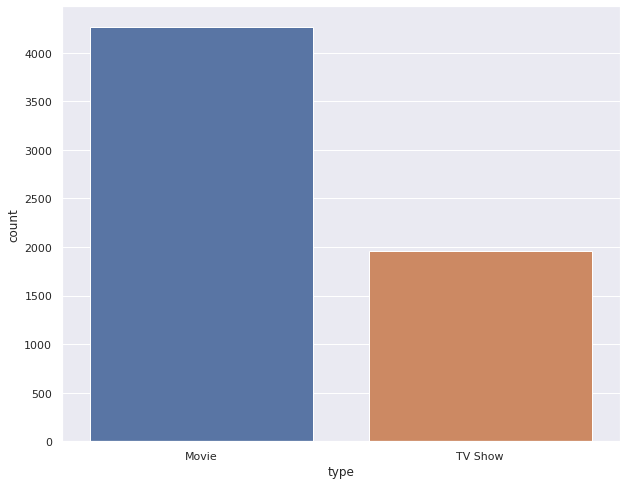

In [ ]:
plt.figure(figsize=(10,8))

sns.countplot(x="type", data=netflix_data_raw);

It looks like there are more number of movies than TV shows on netflix

We'll take a look at the Pie chart for better understanding in terms of percentage

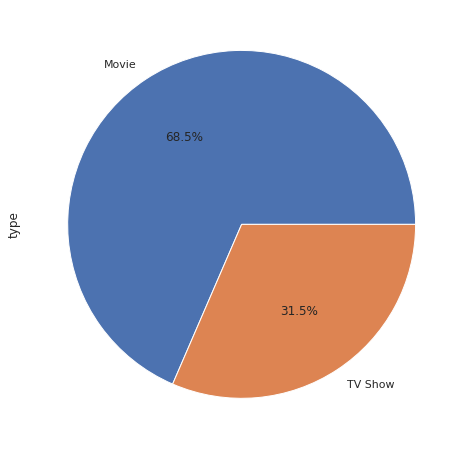

In [ ]:
netflix_data_raw['type'].value_counts().plot.pie(autopct='%1.1f%%',figsize=(10,8));

In [ ]:
netflix_data_raw['type'].value_counts()

Movie      4264
TV Show    1960
Name: type, dtype: int64

Movies releases by years

In [ ]:
movies_on_netflix = netflix_data_raw[netflix_data_raw['type']=="Movie"]

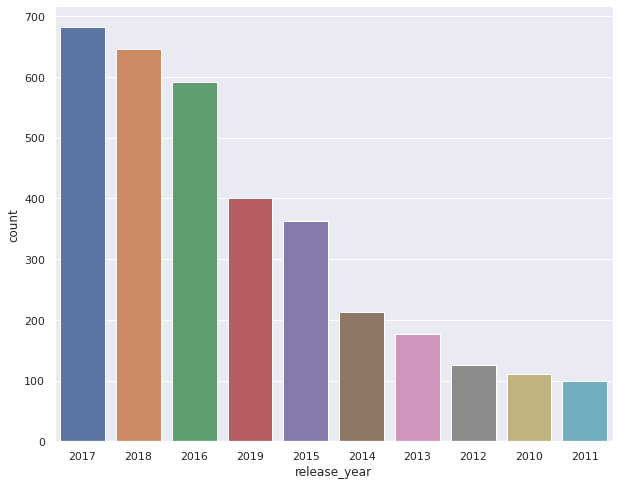

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'release_year', data= movies_on_netflix, order= movies_on_netflix['release_year'].value_counts().index[:10]);


2017 was the year when most movies were released

TV Show releases by year

In [ ]:
tvshows_on_netflix = netflix_data_raw[netflix_data_raw['type']=='TV Show']

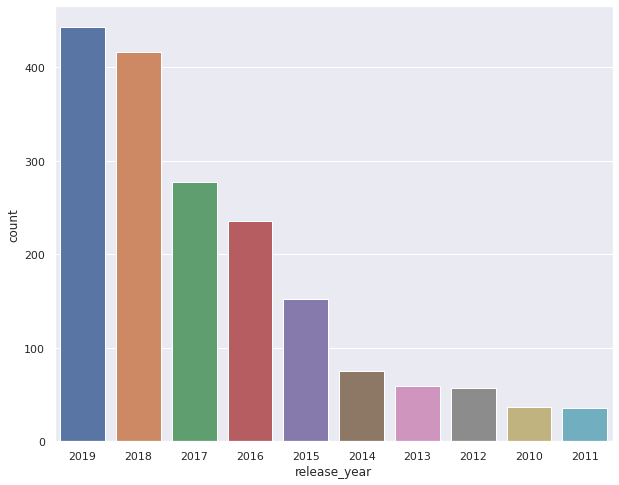

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x = 'release_year', data = tvshows_on_netflix, order = tvshows_on_netflix['release_year'].value_counts().index[:10]);

2019 was the year when most TV shows were released closely followed by 2018

Number of ratings of each type of rating for both TV Show and Movie

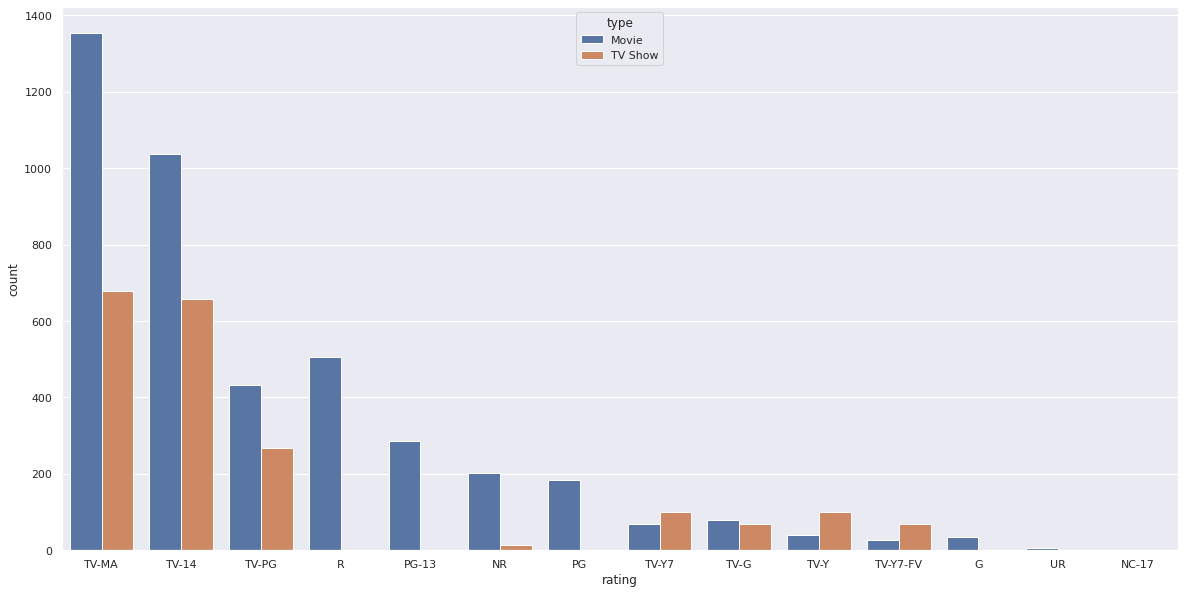

In [ ]:
plt.figure(figsize=(20,10))
sns.countplot(x="rating",data= netflix_data_raw,hue= "type",order = netflix_data_raw['rating'].value_counts().index[:]);

Most content on netflix is rated TV-MA

In [ ]:
netflix_data_raw['rating'].value_counts()

TV-MA       2034
TV-14       1696
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

In [ ]:
# jovian.commit(project=project_name,files = [file_name])

## Asking and Answering Questions


### Q: which country has the highest number of content available 

In [ ]:
top_ten_countries =pd.DataFrame(netflix_data_raw['country'].value_counts().sort_values(ascending = False))
top_ten_countries = top_ten_countries[:10]
top_ten_countries

,country
United States,2501
India,777
United Kingdom,347
Japan,175
Canada,141
South Korea,136
Spain,117
France,90
Mexico,83
Turkey,79


US has the highest number of content available 

### Q: What are some really old movies or Tv Show I can watch on netflix

In [ ]:
old_content = netflix_data_raw.sort_values(by ='release_year')

In [ ]:
old_content = old_content[['release_year', 'title', 'type']]

In [ ]:
old_content[:10]

,release_year,title,type
4292,1925,Pioneers: First Women Filmmakers*,TV Show
2011,1942,Prelude to War,Movie
2013,1942,The Battle of Midway,Movie
2023,1943,Why We Fight: The Battle of Russia,Movie
2022,1943,Undercover: How to Operate Behind Enemy Lines,Movie
2026,1943,WWII: Report from the Aleutians,Movie
2017,1944,The Memphis Belle: A Story of a\nFlying Fortress,Movie
2021,1944,Tunisian Victory,Movie
2019,1944,The Negro Soldier,Movie
2009,1945,Nazi Concentration Camps,Movie


 So "Pioneers: First Women Filmmakers" which was released in year 1925 is the oldest TV Show And "Prelude to War" which was released in 1942 is the oldest movie on netflix.

### Q: What are some titles that kids can watch

In [ ]:
kids_content = netflix_data_raw[['title', 'rating', 'type']].copy()

In [ ]:
kids_content = kids_content[kids_content['rating']=='TV-Y7']

In [ ]:
kids_content[:15]

,title,rating,type
3,Transformers: Robots in Disguise,TV-Y7,TV Show
12,Krish Trish and Baltiboy,TV-Y7,Movie
13,Krish Trish and Baltiboy: Battle of Wits,TV-Y7,Movie
15,Krish Trish and Baltiboy: Comics of India,TV-Y7,Movie
16,Krish Trish and Baltiboy: Oversmartness Never ...,TV-Y7,Movie
17,Krish Trish and Baltiboy: Part II,TV-Y7,Movie
18,Krish Trish and Baltiboy: The Greatest Trick,TV-Y7,Movie
34,Archibald's Next Big Thing,TV-Y7,TV Show
64,Ben 10,TV-Y7,TV Show
70,We Bare Bears,TV-Y7,TV Show


 Content for kids is quite good which includes some great titles like "Ben 10" and the Transformers

### Q: What are some latest titles available on netflix

In [ ]:
latest_content = netflix_data_raw.sort_values(by ='release_year', ascending =False)

In [ ]:
latest_content =latest_content[['release_year', 'title', 'type']]

In [ ]:
latest_content = latest_content[latest_content['release_year']==2020]

In [ ]:
latest_content

,release_year,title,type
3353,2020,Ares,TV Show
3195,2020,"Live Twice, Love Once",Movie
3220,2020,Dracula,TV Show
3221,2020,Go! Go! Cory Carson,TV Show
3249,2020,All the Freckles in the World,Movie
3573,2020,The Circle,TV Show
3562,2020,Spinning Out,TV Show
3546,2020,"Nisman: The Prosecutor, the President, and the...",TV Show
3541,2020,Messiah,TV Show
3518,2020,Ghost Stories,Movie


 There's quite a lot of latest Tv Shows and few movies that are on netflix. 

### Q: Which genre has the highest content available

In [ ]:
popular_genre = pd.DataFrame(netflix_data_raw['listed_in'].value_counts().sort_values(ascending= False))

In [ ]:
popular_genre= popular_genre[:10]

In [ ]:
popular_genre

,listed_in
Documentaries,299
Stand-Up Comedy,273
"Dramas, International Movies",248
"Dramas, Independent Movies, International Movies",186
"Comedies, Dramas, International Movies",174
Kids' TV,158
"Documentaries, International Movies",150
"Children & Family Movies, Comedies",129
"Comedies, International Movies",120
Children & Family Movies,120


Documentaries has the highest number closely followed by Stand-Up comedy

## Inferences and Conclusion

Netflix has different type of content available on the platform but, the number of movies are clearly more than number of Tvshows.

US has the most number of content available on netflix but the availability of content is wide aand across many countries.

There is content available for every Age-group.

With this much content available,Netflix is the goto place for nice relaxing weekends.


## References and Future Work

Some useful links

Netflix data set - https://www.kaggle.com/shivamb/netflix-shows 